### load dataset

In [ ]:
!pip3 install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 17.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 14.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [69]:
from torch.utils.data import Dataset, DataLoader, TensorDataset
from datasets import load_dataset
from sentence_transformers import SentenceTransformer
import torch.nn as nn
import numpy as np
from tqdm import tqdm

In [ ]:
class CustomDataset(Dataset):
  def __init__(self, name_data, name_model):
    self.data = load_dataset(name_data)
    self.model = SentenceTransformer(name_model)
  def split_data(self):
    model_ = self.model
    train_emb = model_.encode(self.data['train']['text'], show_progress_bar=True)
    test_emb = model_.encode(self.data['test']['text'], show_progress_bar=True)
    val_emb = model_.encode(self.data['validation']['text'], show_progress_bar=True)

    return train_emb, test_emb , val_emb


In [ ]:
name_data = "cornell-movie-review-data/rotten_tomatoes"
name_model = 'sentence-transformers/all-mpnet-base-v2'
custom = CustomDataset(name_data, name_model)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/7.46k [00:00<?, ?B/s]

train.parquet:   0%|          | 0.00/699k [00:00<?, ?B/s]

validation.parquet:   0%|          | 0.00/90.0k [00:00<?, ?B/s]

test.parquet:   0%|          | 0.00/92.2k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8530 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/1066 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1066 [00:00<?, ? examples/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
data = custom.data
data.shape

{'train': (8530, 2), 'validation': (1066, 2), 'test': (1066, 2)}

In [ ]:
num_class , name_class = len(np.unique(data['train']['label'])) , np.unique(data['train']['label'])
num_class , name_class
num_samples , num_features = data['train'].shape
num_features -= 1
num_samples, num_features

(8530, 1)

In [ ]:
data['train']['text'][:3]

['the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'the gorgeously elaborate continuation of " the lord of the rings " trilogy is so huge that a column of words cannot adequately describe co-writer/director peter jackson\'s expanded vision of j . r . r . tolkien\'s middle-earth .',
 'effective but too-tepid biopic']

In [ ]:
import numpy as np

data.items()

dict_items([('train', Dataset({
    features: ['text', 'label'],
    num_rows: 8530
})), ('validation', Dataset({
    features: ['text', 'label'],
    num_rows: 1066
})), ('test', Dataset({
    features: ['text', 'label'],
    num_rows: 1066
}))])

In [ ]:
train_emb, test_emb, val_emb = custom.split_data()

Batches:   0%|          | 0/267 [00:00<?, ?it/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

Batches:   0%|          | 0/34 [00:00<?, ?it/s]

In [ ]:
test_emb

array([[-0.00971333, -0.03212754, -0.01338801, ...,  0.04149761,
         0.03629187, -0.02439312],
       [ 0.01236754,  0.02792638, -0.00684275, ...,  0.03615357,
        -0.02617741, -0.02861588],
       [ 0.00230315,  0.03361657,  0.00886128, ...,  0.00238325,
        -0.00254128, -0.0061261 ],
       ...,
       [ 0.08338302,  0.09190685,  0.03388631, ...,  0.01532966,
        -0.06411342,  0.00603906],
       [-0.00773832, -0.05672737,  0.02266575, ...,  0.01432171,
        -0.00241535, -0.03798973],
       [ 0.03279956,  0.02374568, -0.00388514, ...,  0.00357716,
         0.01525657,  0.01938743]], dtype=float32)

In [ ]:
train_emb.dtype, train_emb.shape

(dtype('float32'), (8530, 768))

In [ ]:
# conver to tensor
import torch
train_emb_tensor = torch.as_tensor(train_emb, dtype=torch.float)
test_emb_tensor = torch.as_tensor(test_emb, dtype=torch.float)
val_emb_tensor = torch.as_tensor(val_emb, dtype=torch.float)


train_emb_tensor.shape, test_emb_tensor.shape, val_emb_tensor.shape

(torch.Size([8530, 768]), torch.Size([1066, 768]), torch.Size([1066, 768]))

In [ ]:
train_label = data['train']['label']
test_label = data['test']['label']
val_label = data['validation']['label']

train_label_tensor = torch.as_tensor(train_label, dtype=torch.float).reshape(-1,1)
test_label_tensor = torch.as_tensor(test_label, dtype=torch.float).reshape(-1,1)
val_label_tensor = torch.as_tensor(val_label, dtype=torch.float).reshape(-1,1)



train_label_tensor.shape, test_label_tensor.shape, val_label_tensor.shape


(torch.Size([8530, 1]), torch.Size([1066, 1]), torch.Size([1066, 1]))

In [ ]:
train_set = TensorDataset(train_emb_tensor, train_label_tensor)
test_set = TensorDataset(test_emb_tensor, test_label_tensor)
val_set = TensorDataset(val_emb_tensor, test_label_tensor)


In [ ]:
train_dataloader = DataLoader(dataset = train_set, batch_size=265, shuffle=True)
test_dataloader  = DataLoader(dataset = test_set, batch_size = 64, shuffle=False )
val_dataloader  = DataLoader(dataset = val_set, batch_size = 64, shuffle=False )



In [ ]:
x_batch, y_batch = next(iter(train_dataloader))

In [ ]:
x_batch.shape , y_batch.shape , x_batch.dtype

(torch.Size([265, 768]), torch.Size([265, 1]), torch.float32)

# Create model for binary class classification

In [70]:
class MLP_NET(nn.Module):
    def __init__(self):
        super(MLP_NET, self).__init__()
        self.fc = nn.Sequential(
            nn.Dropout(0.2),
            nn.Linear(in_features=768, out_features= 10),
            #nn.Dropout(0.2),
            # nn.ReLU(),
            nn.Linear(in_features=10, out_features=5),
            # nn.ReLU(),
            nn.Linear(in_features=5, out_features=1),
            nn.Sigmoid()
        )
        # self.fc1 = nn.Linear(768, 20)
        # self.fc2 = nn.Linear(20, 10)
        # self.fc3 = nn.Linear(10, 1)
        # self.relu = nn.ReLU()
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):

       return self.fc(x)
      # x = self.relu(self.fc1(x))
      # x = self.relu(self.fc2(x))
      # x = self.sigmoid(self.fc3(x))
      # return x

In [71]:
model = MLP_NET()

In [ ]:
y_hat = model(x_batch)
y_hat.shape ,y_batch.shape , y_hat[:4].round() ,y_batch[:4]

(torch.Size([265, 1]),
 torch.Size([265, 1]),
 tensor([[0.],
         [0.],
         [0.],
         [0.]], grad_fn=<RoundBackward0>),
 tensor([[1.],
         [0.],
         [0.],
         [1.]]))

### Initializing Loss Function
* binary cross entropy loss

In [ ]:
loss_fun = nn.BCELoss()
loss_fun

BCELoss()

### test error

In [ ]:
y_hat.dtype, y_batch.dtype

(torch.float32, torch.float32)

In [ ]:
loss = loss_fun(y_hat, y_batch)
loss

tensor(0.6972, grad_fn=<BinaryCrossEntropyBackward0>)

In [ ]:
x_v , y_v = next(iter(val_dataloader))
y_v[:3]

tensor([[1.],
        [1.],
        [1.]])

In [ ]:
y_hat_v = model(x_v)
y_hat_v[:3]
y_pred = torch.argmax(y_hat_v, dim=1)
y_hat_v[:4].round()

tensor([[0.],
        [0.],
        [0.],
        [0.]], grad_fn=<RoundBackward0>)

In [ ]:
loss_ = loss_fun(y_hat_v, y_v)
loss_

tensor(0.8099, grad_fn=<BinaryCrossEntropyBackward0>)

### optimizer

In [72]:
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.001
    maximize: False
    weight_decay: 0
)

In [74]:
num_epochs = 20
loss_train_hist, loss_valid_hist = [], []
acc_train_hist, acc_valid_hist = [], []

for epoch in tqdm(range(num_epochs)):

  mean_loss_train, mean_loss_valid = 0, 0
  mean_acc_train, mean_acc_valid = 0, 0
  model.train()
  for x_batch, y_batch in train_dataloader:

    # model
    y_hat = model(x_batch)

    # loss
    loss = loss_fun(y_hat, y_batch)

    # gradient
    loss.backward()

    # update
    optimizer.step()
    optimizer.zero_grad()


    mean_loss_train += loss.item() * len(x_batch)
    mean_acc_train +=(y_hat.round()==y_batch).sum().item()

  mean_loss_train = mean_loss_train / len(train_set)
  mean_acc_train = mean_acc_train  / len(train_set)
  loss_train_hist.append(mean_loss_train)
  acc_train_hist.append(mean_acc_train)

  model.eval()
  with torch.no_grad():
    for x_batch, y_batch in val_dataloader:
      y_hat = model(x_batch)
      loss = loss_fun(y_hat, y_batch)
      mean_loss_valid += loss.item()* len(x_batch)
      mean_acc_valid +=(y_hat.round()==y_batch).sum().item()
      # print(mean_loss_valid)

    mean_loss_valid = mean_loss_valid / len(val_set)
    mean_acc_valid = mean_acc_valid  / len(val_set)
    loss_valid_hist.append(mean_loss_valid)
    acc_valid_hist.append(mean_acc_valid)
  if epoch % 5 == 0:
    print(
        f" Epoch: {epoch} "
        f" Loss train: {mean_loss_train:.2f}"
        f" Accuracy train: {mean_acc_train:.2f}"
        f" Loss valid: {mean_loss_valid:.2f}"
        f" Accuracy valid: {mean_acc_valid:.2f}"
        )



  5%|▌         | 1/20 [00:00<00:10,  1.84it/s]

 Epoch: 0  Loss train: 0.33 Accuracy train: 0.85 Loss valid: 0.34 Accuracy valid: 0.86


 30%|███       | 6/20 [00:02<00:06,  2.14it/s]

 Epoch: 5  Loss train: 0.33 Accuracy train: 0.86 Loss valid: 0.34 Accuracy valid: 0.85


 55%|█████▌    | 11/20 [00:04<00:02,  3.58it/s]

 Epoch: 10  Loss train: 0.33 Accuracy train: 0.86 Loss valid: 0.34 Accuracy valid: 0.85


 85%|████████▌ | 17/20 [00:05<00:00,  5.02it/s]

 Epoch: 15  Loss train: 0.33 Accuracy train: 0.86 Loss valid: 0.34 Accuracy valid: 0.86


100%|██████████| 20/20 [00:05<00:00,  3.43it/s]


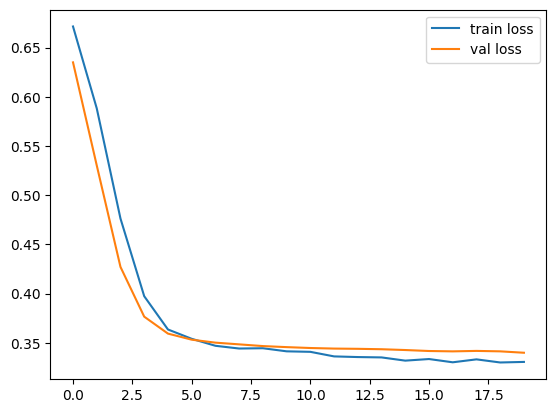

In [ ]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(num_epochs),loss_train_hist , label='train loss')
plt.plot(torch.arange(num_epochs),loss_valid_hist ,label='val loss')
plt.legend()



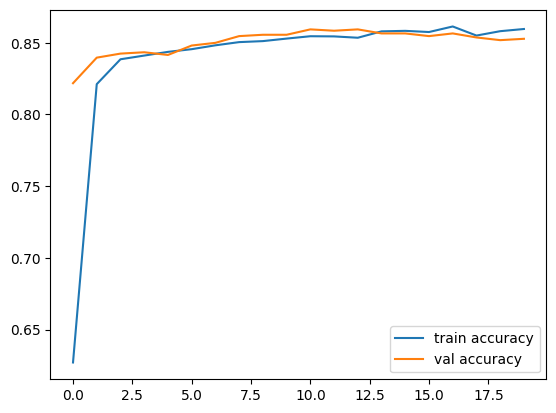

In [ ]:
import matplotlib.pyplot as plt
plt.plot(torch.arange(num_epochs),acc_train_hist , label='train accuracy')
plt.plot(torch.arange(num_epochs),acc_valid_hist ,label='val accuracy')
plt.legend()


In [ ]:
mean_acc_test = 0
mean_loss_test = 0

with torch.no_grad():
  for x_batch, y_batch in test_dataloader:
    y_hat = model(x_batch)
    loss = loss_fun(y_hat, y_batch)
    mean_loss_test += loss.item()* len(x_batch)
    mean_acc_test +=(y_hat.round()==y_batch).sum().item()

  mean_acc_test = mean_acc_test / len(test_set)
print(f'accuracy test data: {mean_acc_test:.3f}')

accuracy test data: 0.854


In [ ]:
!pip3 install visualtorch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.7/993.7 kB 45.9 MB/s eta 0:00:00


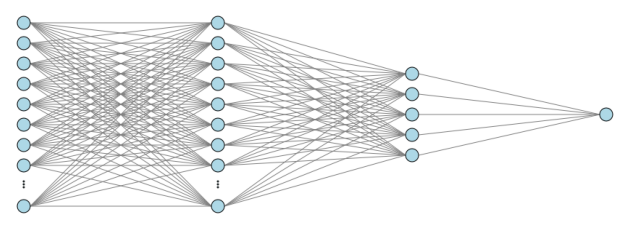

In [ ]:
import visualtorch
input_shape = (1,768)

img = visualtorch.graph_view(model, input_shape, node_size=18)

plt.axis("off")
plt.tight_layout()
plt.imshow(img)
plt.show()

## The section we uses classifier  for task
* Random forest
* Super vector machine
* K-nearest-neighbors
* xgboost classifier
* Gradient boosting
* logisticRegressian

In [ ]:
def accuracy(y_true, y_pred):
  return np.mean(y_pred == y_true)


In [ ]:
train_emb.shape , test_emb.shape ,

((8530, 768), (1066, 768))

## convert label list to numpy array

In [ ]:
y_train = np.array(train_label)
y_test = np.array(test_label)
y_train.shape, y_test.shape

((8530,), (1066,))

In [ ]:
y_train[:5]

array([1, 1, 1, 1, 1])

In [ ]:
from sklearn.linear_model import  LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.svm  import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import GradientBoostingClassifier as GBC
from xgboost import XGBClassifier as xgb

In [ ]:
def calculate_predection(train_emb, teat_emb, y_train, y_test, cls_class, **kwargs):
  clf = cls_class(**kwargs)
  clf.fit(train_emb, y_train)
  y_pred = clf.predict(test_emb)
  return y_pred


In [40]:
print(f'accuracy logisticRegressian: {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, LR )):.3f}')
print(f'accuracy Random Forest : {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, RF )):.3f}')
print(f'accuracy Gredient boosting: {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, GBC )):.3f}')
print(f'accuracy super vector machine: {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, SVC )):.3f}')
print(f'accuracy K-nearest-neighbors:: {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, KNN)):.3f}')
print(f'accuracy xgboost classifier :: {accuracy(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, xgb)):.3f}')




accuracy logisticRegressian: 0.852
accuracy Random Forest : 0.837
accuracy Gredient boosting: 0.833
accuracy super vector machine: 0.850
accuracy K-nearest-neighbors:: 0.807
accuracy xgboost classifier :: 0.834


In [41]:

from sklearn import metrics
def roc_curv(y_true, y_pred):
  fpr, tpr, thresholds = metrics.roc_curve(y_true, y_pred)
  roc_auc = metrics.auc(fpr, tpr)
  display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                    estimator_name='example estimator')
  return display



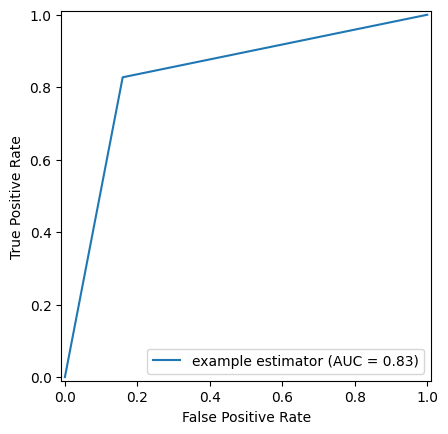

In [45]:
display_LR = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, LR ))
display_RF = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, RF ))
display_GBC = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, GBC ))
display_SVC = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, SVC ))
display_KNN = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, KNN ))
display_xgb = roc_curv(y_test, calculate_predection(train_emb, test_emb, y_train, y_test, xgb ))
list_display = [display_LR, display_RF, display_GBC, display_SVC, display_KNN, display_xgb]


In [67]:
name_classifier = ['LR','RF','GBC','SVC', 'KNN','xgb']

Plotting subplots: 100%|██████████| 6/6 [00:00<00:00, 22.31it/s]


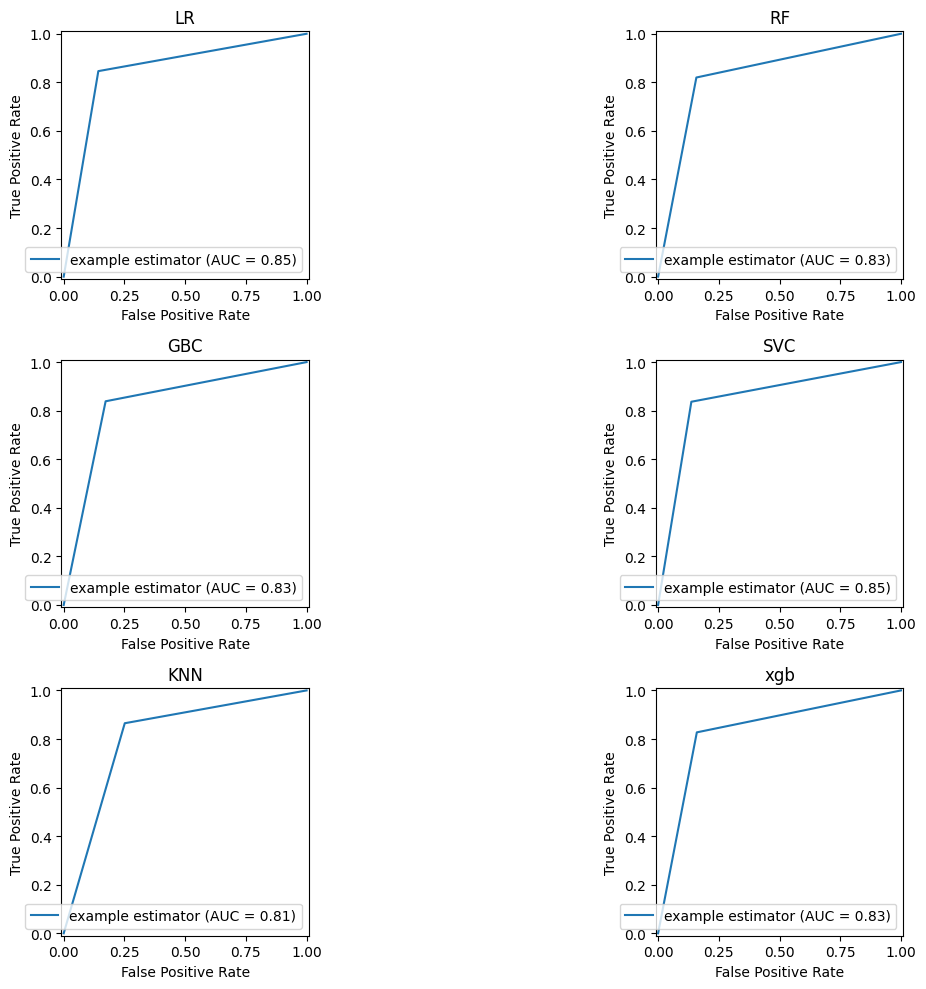

In [68]:

fig = plt.figure(figsize=(14, 10))
rows, cols = 3 , 2
for i in tqdm(range(len(list_display)), desc='Plotting subplots'):
  ax=fig.add_subplot(rows, cols, i+1)
  list_display[i].plot(ax=ax)
  plt.title(name_classifier[i])
 # ax.axis(False);
plt.tight_layout()
plt.show()
